### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [8]:
import pandas as pd

In [10]:
# your code and solutions
#Reading the given dataset in the original form ie with gender/rating and helpfulness values missing

print("Original length of data set : ",len (df))
df = pd.read_csv ('The E-commerce dataset.csv')
#printing the original length onting number of null values
print("The number of null values in this dataset : ", df.isnull().sum())
#Removing the records that have missing values and the review is 'none'

condition1 = df ['gender'].notnull()
condition2 = df['rating'].notnull()
condition3 = df['helpfulness'].notnull()
condition4 = df['review']!= 'none'
new_df = df[condition1 & condition2 & condition3 & condition4]
#Printing the new length of dataset
newLength = len (new_df)
print ("The new length of the data set : ", newLength)
#Counting number of 'none' values in review column
count_none = condition4.sum()
print("Number of not 'none' values in dataset :" , count_none)
#Number of values in review column where value is 'none'
print("Number of 'none' values in review column : ", 20000- count_none)

#Saving the new_df to .csv form
new_df.to_csv('Cleaned_Ecommerce_Dataset.csv', index= False)


Original length of data set :  20000
The number of null values in this dataset :  userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64
The new length of the data set :  19916
Number of not 'none' values in dataset : 19982
Number of 'none' values in review column :  18


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [2]:
# your code and solutions
new_df = pd.read_csv('Cleaned_Ecommerce_Dataset.csv')
#Counting number ofunique users, unique reviews, items and categories
unique_reviews = new_df['review'].nunique()
unique_categories = new_df['category'].nunique()
unique_items = new_df [ 'item'].nunique()
unique_users = new_df['userId'].nunique()
print ("Number of unique users : ", unique_users)
print ("Number of unique reviews : ", unique_reviews)
print ("Number of unique items : ", unique_items)
print ("Number of unique categories :", unique_categories)


NameError: name 'pd' is not defined

In [31]:
#Descriptive statistics
#using the function to get the mean,std,min and max values of the rating column

print(new_df['rating'].describe())


count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [12]:
#counting the number of items rated by males and females
counting_gender = new_df.groupby('gender')['item'].count()
print(counting_gender.describe())

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64


In [13]:
#counting number of ratings received by each item
counting_rating = new_df.groupby('item')['rating'].count()
print (counting_rating.describe())

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<Axes: title={'center': 'Boxplot between gender and ratings'}, xlabel='gender', ylabel='rating'>

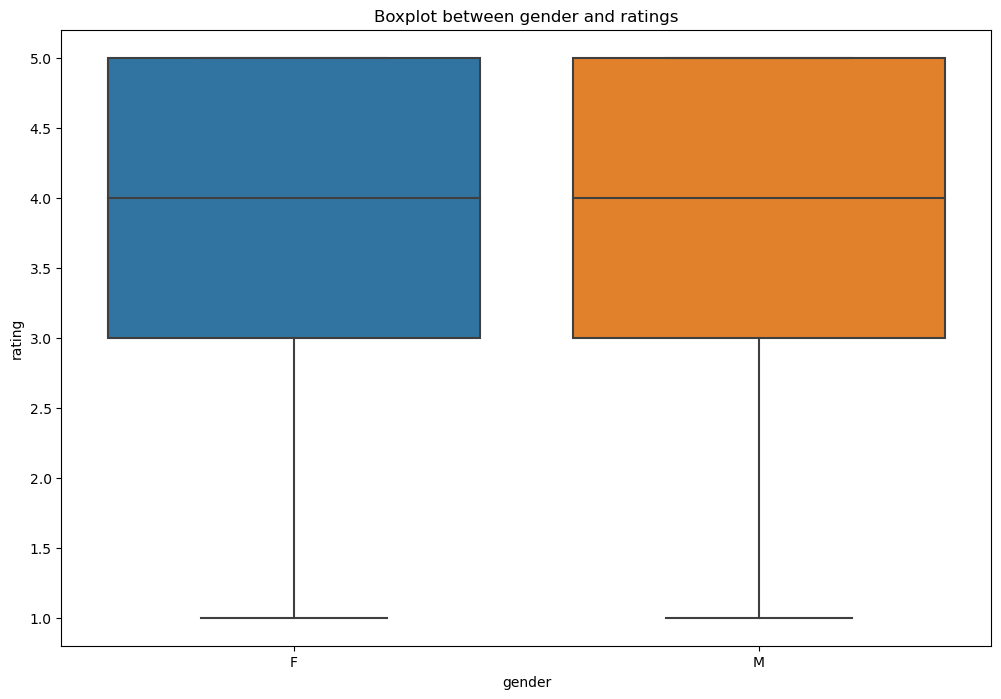

In [14]:
# your code and solutions
#importing matplotlib.pyplot and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
#plot size
plt.figure (figsize=(12,8))
plt.title("Boxplot between gender and ratings")
sns.boxplot(x='gender', y='rating', data = new_df)

#Analysis-
#Both the genders have given similar ratings. 
#50% of males and females have provided rating above 4
#Whereas the remaining 50% has provided it below 4. 
#However, the maximum number of people have provided a rating of 4 across both genders
#The lowest rating provided is 1.0 by both males and females

<Axes: title={'center': 'Boxplot between helpfulness and ratings'}, xlabel='helpfulness', ylabel='rating'>

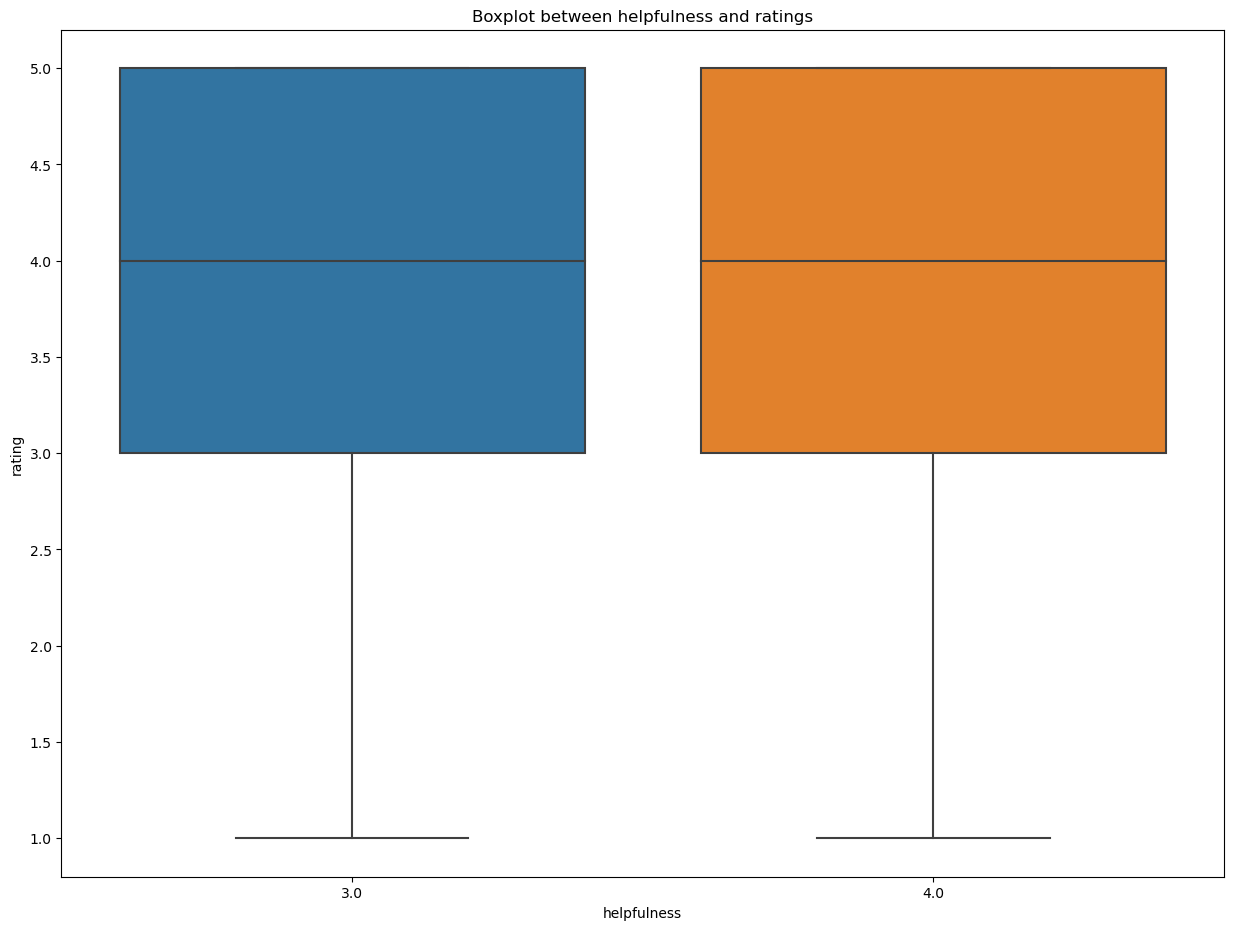

In [68]:
# your code and solutions
#plot size
plt.figure (figsize=(15,11))
plt.title("Boxplot between helpfulness and ratings")
sns.boxplot(x='helpfulness',y= 'rating', data = new_df)

#Analysis
#In maximum number of cases the rating is 4.
# More than 50% people have given a rating of 4 if the level of helpfulness was 2.
#The lowest received is 1.
#



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Online Stores & Services'),
  Text(1, 0, 'Movies'),
  Text(2, 0, 'Restaurants & Gourmet'),
  Text(3, 0, 'Personal Finance'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Hotels & Travel'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Games'),
  Text(8, 0, 'Books')])

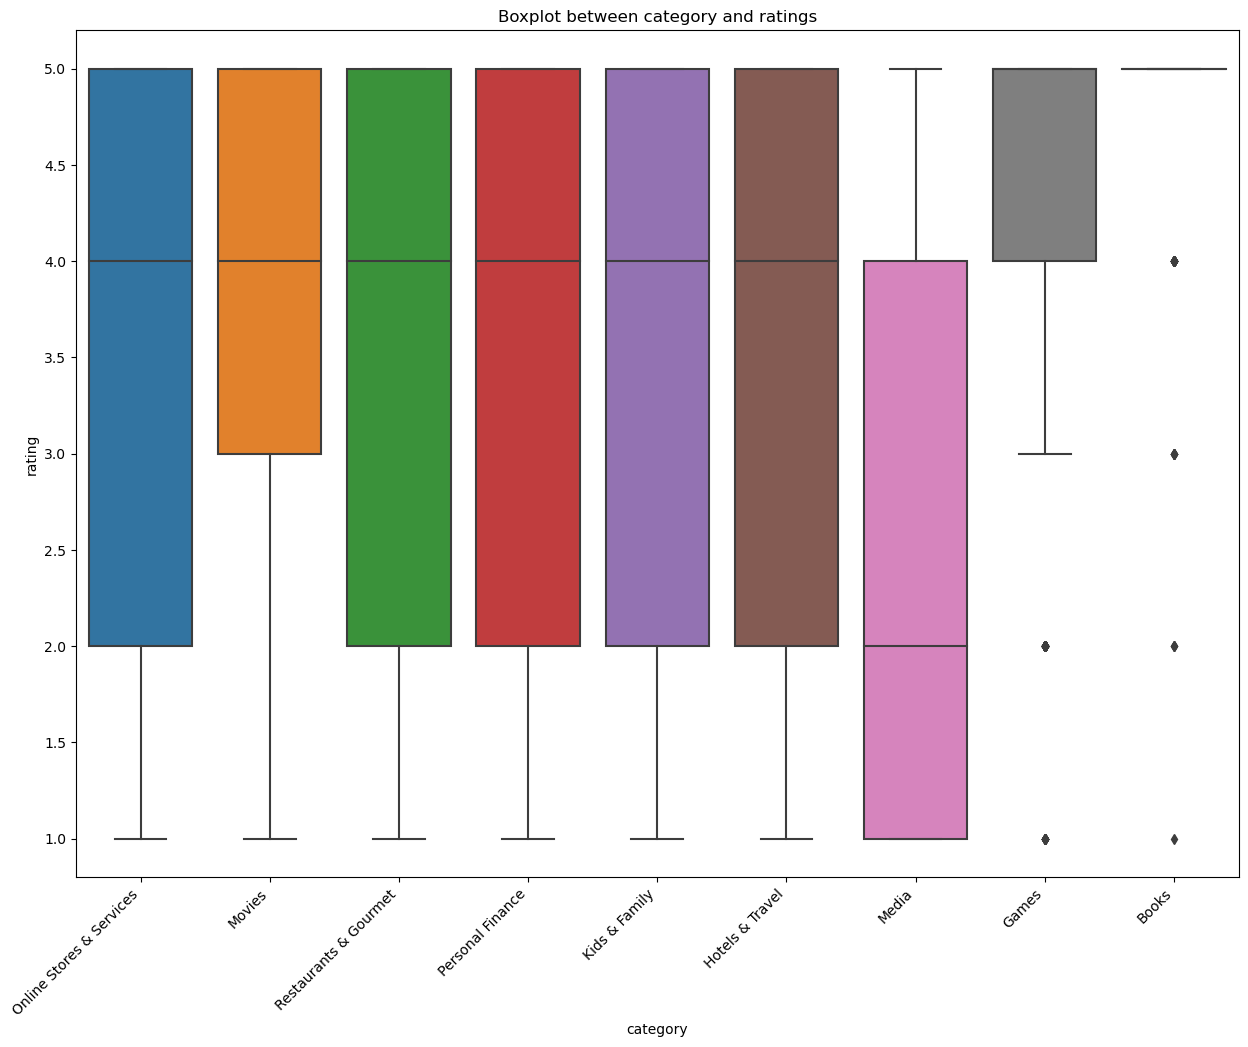

In [15]:
# your code and solutions
plt.figure (figsize=(15,11))
plt.title("Boxplot between category and ratings")
sns.boxplot(x='category',y= 'rating', data = new_df)
plt.xticks(rotation= 45, ha='right')

#Analysis
#Most of the categories except media and games have received a median rating of 4.
#The median rating of media 2 which means the most of people rated it as 2.
#No ratings have been made of the books
#50% of people have rated movies above 4 whereas the others have rated in below 4
#The rating patterns of finance,restuarants,hotels,online stores are very similiar in nature



#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [1]:
# your code and solutions
#Removing data as per rule 1
help_review = new_df.groupby('review')['helpfulness'].count()
outlier_review= help_review[help_review <= 2].index
new_df = new_df[~new_df['review'].isin(outlier_review)]

#Removing data as per rule 2
#groups users by items
item_user_count= new_df.groupby('userId')['item'].nunique()
#checks the condition of users who rate less than 7 items
outlier_user = item_user_count[item_user_count<7].index
new_df= new_df[~new_df['userId'].isin(outlier_user)]

#Removing data as per rule 3
item_rating_count= new_df.groupby('item')['rating'].count()
#checks the condition of items who have rating less than 11
outlier_ratingitems= item_rating_count[item_rating_count<11].index
new_df= new_df[~new_df['item'].isin(outlier_ratingitems)]

# Calculating new length
print("Length of cleansed data is:", len(new_df))




NameError: name 'new_df' is not defined